Machine Learning for Engineers

Homework 4

Caleb Malinowski

RIN: 662052559

Question 1

In [ ]:
from keras.datasets import cifar10
from keras.models import Sequential
from keras.layers import Dense, Flatten, Dropout
from keras.utils import to_categorical
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import train_test_split
import tensorflow as tf

# load data
(x_all, y_all), (x_test, y_test) = cifar10.load_data()

# normalize
x_all = x_all.astype('float32') / 255.0
x_test = x_test.astype('float32') / 255.0

# split data 70-30
x_train, x_val, y_train, y_val = train_test_split( x_all, y_all, test_size=0.3, random_state=42, stratify=y_all)

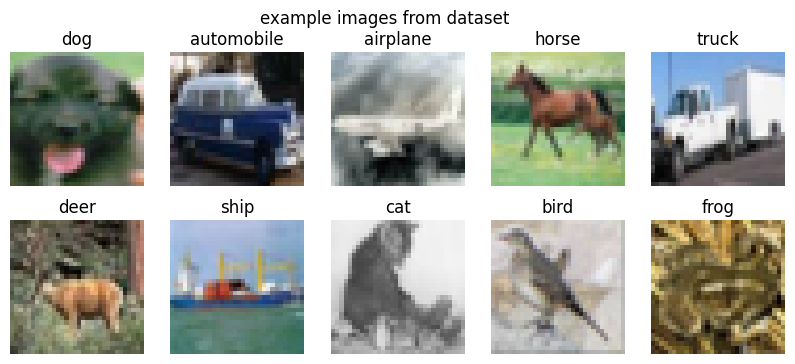

In [ ]:
# plot images from each category
class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer','dog', 'frog', 'horse', 'ship', 'truck']

plt.figure(figsize=(10,4))
shown = set()
i = 1
for idx, label in enumerate(y_train.flatten()):
    if label not in shown:
        plt.subplot(2,5,i)
        plt.imshow(x_train[idx])
        plt.title(class_names[label])
        plt.axis('off')
        shown.add(label)
        i += 1
    if i > 10:
        break
plt.suptitle("example images from dataset")
plt.show()

In [ ]:
# flatten images
x_train_flat = x_train.reshape(len(x_train), -1)
x_val_flat   = x_val.reshape(len(x_val), -1)
x_test_flat  = x_test.reshape(len(x_test), -1)
y_train_cat = to_categorical(y_train, 10)
y_val_cat   = to_categorical(y_val, 10)
y_test_cat  = to_categorical(y_test, 10)

In [ ]:
# grid search parameters
hidden_units_list = [256, 512]
dropout_rates = [0.3, 0.5]
learning_rates = [1e-3, 1e-4]
batch_sizes = [32, 64, 128]
best_val_acc = 0
best_model = None
best_history = None
best_config = None

# loop over parameters for best model
for hidden_units in hidden_units_list:
    for dropout_rate in dropout_rates:
        for lr in learning_rates:
            for batch_size in batch_sizes:
                print(f"\nTraining model: hidden={hidden_units}, dropout={dropout_rate}, lr={lr}, batch={batch_size}")

                # model parameters, use last layer 10 for cifar and relu
                model = Sequential()
                model.add(Dense(hidden_units, activation='relu', input_shape=(32*32*3,)))
                model.add(Dropout(dropout_rate))
                model.add(Dense(hidden_units//2, activation='relu'))
                model.add(Dropout(dropout_rate))
                model.add(Dense(10, activation='softmax'))

                # compile using adam
                opt = tf.keras.optimizers.Adam(learning_rate=lr)
                model.compile(optimizer=opt, loss='categorical_crossentropy', metrics=['accuracy'])

                # training
                history = model.fit(
                    x_train_flat, y_train_cat, # Use flattened data for training
                    epochs=10,
                    batch_size=batch_size,
                    validation_data=(x_val_flat, y_val_cat), # Use flattened data for validation
                    verbose=0
                )

                # print accuracy for grid search
                val_acc = max(history.history['val_accuracy'])
                print(f"accuracy: {val_acc:.4f}")

                # store the model with highest accuracy and display the parameters
                if val_acc > best_val_acc:
                    best_val_acc = val_acc
                    best_model = model
                    best_history = history
                    best_config = (hidden_units, dropout_rate, lr, batch_size)

print("\noptimized model (results of grid search):")
print(f"Hidden units={best_config[0]}, Dropout={best_config[1]}, LR={best_config[2]}, Batch={best_config[3]}")
print(f"accuracy = {best_val_acc:.4f}")


Training model: hidden=256, dropout=0.3, lr=0.001, batch=32


/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


accuracy: 0.3532

Training model: hidden=256, dropout=0.3, lr=0.001, batch=64
accuracy: 0.3830

Training model: hidden=256, dropout=0.3, lr=0.001, batch=128
accuracy: 0.3979

Training model: hidden=256, dropout=0.3, lr=0.0001, batch=32
accuracy: 0.4393

Training model: hidden=256, dropout=0.3, lr=0.0001, batch=64
accuracy: 0.4498

Training model: hidden=256, dropout=0.3, lr=0.0001, batch=128
accuracy: 0.4362

Training model: hidden=256, dropout=0.5, lr=0.001, batch=32
accuracy: 0.1990

Training model: hidden=256, dropout=0.5, lr=0.001, batch=64
accuracy: 0.2350

Training model: hidden=256, dropout=0.5, lr=0.001, batch=128
accuracy: 0.2845

Training model: hidden=256, dropout=0.5, lr=0.0001, batch=32
accuracy: 0.3951

Training model: hidden=256, dropout=0.5, lr=0.0001, batch=64
accuracy: 0.3986

Training model: hidden=256, dropout=0.5, lr=0.0001, batch=128
accuracy: 0.3925

Training model: hidden=512, dropout=0.3, lr=0.001, batch=32
accuracy: 0.3678

Training model: hidden=512, dropout=

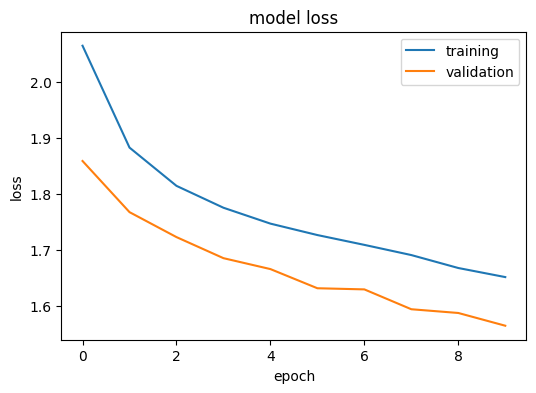

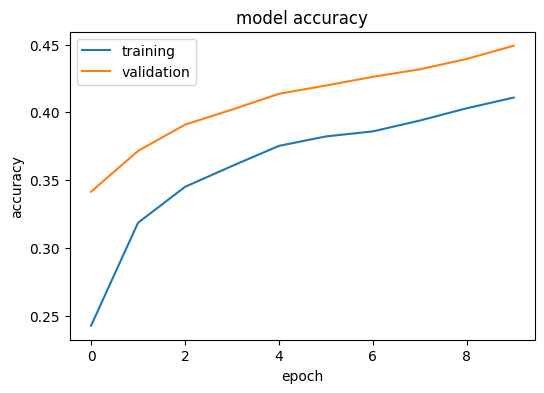

In [ ]:
# plotting
plt.figure(figsize=(6,4))
plt.plot(best_history.history['loss'], label='training')
plt.plot(best_history.history['val_loss'], label='validation')
plt.title('model loss')
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend()
plt.show()

plt.figure(figsize=(6,4))
plt.plot(best_history.history['accuracy'], label='training')
plt.plot(best_history.history['val_accuracy'], label='validation')
plt.title('model accuracy')
plt.xlabel('epoch')
plt.ylabel('accuracy')
plt.legend()
plt.show()



Question 2

   Frequency  Angle_of_attack  Chord_length  Free_stream_velocity  \
0        800              0.0        0.3048                  71.3   
1       1000              0.0        0.3048                  71.3   
2       1250              0.0        0.3048                  71.3   
3       1600              0.0        0.3048                  71.3   
4       2000              0.0        0.3048                  71.3   

   Suction_side_displacement_thickness  Scaled_sound_pressure_level  
0                             0.002663                      126.201  
1                             0.002663                      125.201  
2                             0.002663                      125.951  
3                             0.002663                      127.591  
4                             0.002663                      127.461  


<Figure size 2000x1200 with 0 Axes>

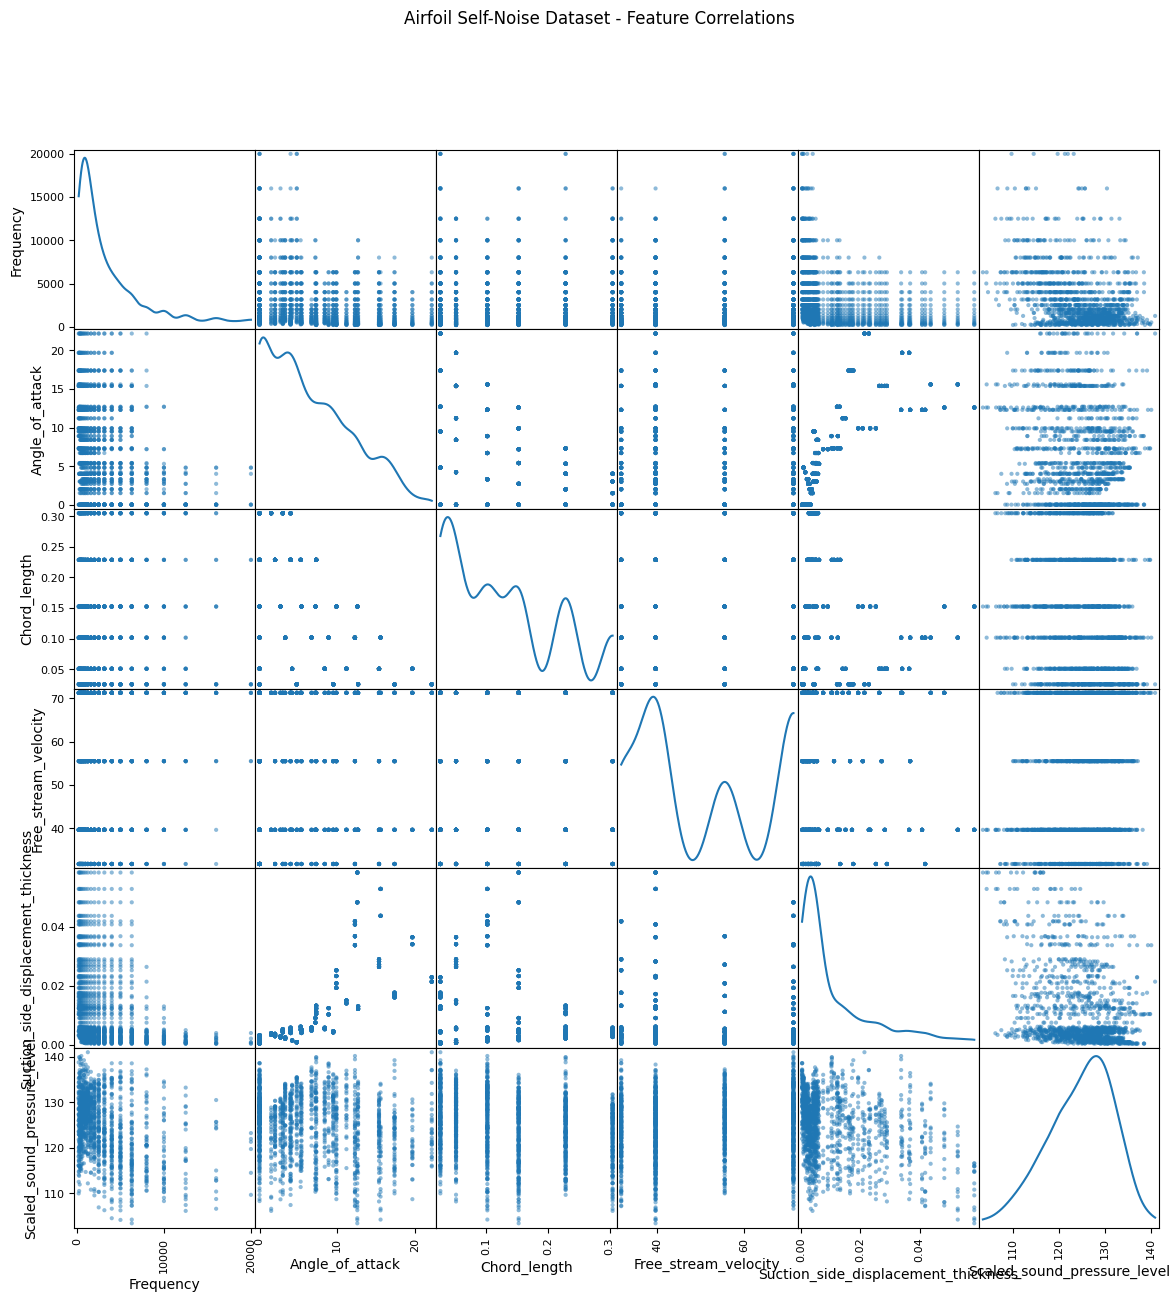

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import r2_score
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam

# load data
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/00291/airfoil_self_noise.dat"
cols = ['Frequency', 'Angle_of_attack', 'Chord_length', 'Free_stream_velocity', 'Suction_side_displacement_thickness', 'Scaled_sound_pressure_level']
df = pd.read_csv(url, sep='\t', header=None, names=cols)
print(df.head())

# visuaize the dataset
plt.figure(figsize=(20,12))
pd.plotting.scatter_matrix(df, figsize=(14,14), diagonal='kde')
plt.suptitle('Airfoil Self-Noise Dataset - Feature Correlations')
plt.show()

In [ ]:
# split the data 70-30
X = df.iloc[:, :-1].values
y = df.iloc[:, -1].values

x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# standardize
scaler = StandardScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)

In [ ]:
# model parameters
model = Sequential()
model.add(Dense(128, activation='relu', input_shape=(5,)))
model.add(Dense(128, activation='relu'))
model.add(Dense(64, activation='relu'))
model.add(Dense(1))
model.compile(optimizer=Adam(learning_rate=0.001), loss='mse', metrics=['mae'])

# train
history = model.fit(
    x_train, y_train,
    epochs=200,
    batch_size=16,
    validation_data=(x_test, y_test),
)

Epoch 1/200


/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


66/66 ━━━━━━━━━━━━━━━━━━━━ 3s 19ms/step - loss: 14008.2559 - mae: 117.1545 - val_loss: 1082.2146 - val_mae: 27.7480
Epoch 2/200
66/66 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 923.2120 - mae: 24.1389 - val_loss: 415.8735 - val_mae: 16.5250
Epoch 3/200
66/66 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 411.4273 - mae: 16.2778 - val_loss: 324.2776 - val_mae: 14.5355
Epoch 4/200
66/66 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 304.5332 - mae: 14.1994 - val_loss: 250.4607 - val_mae: 12.7401
Epoch 5/200
66/66 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 243.4031 - mae: 12.6565 - val_loss: 202.9661 - val_mae: 11.4796
Epoch 6/200
66/66 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 214.2115 - mae: 11.9149 - val_loss: 163.9691 - val_mae: 10.2007
Epoch 7/200
66/66 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 166.9739 - mae: 10.3999 - val_loss: 130.4786 - val_mae: 9.1058
Epoch 8/200
66/66 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 135.3765 - mae: 9.3210 - val_loss: 106.7443 - val_mae: 8.2880
Epoch 9/200
66/66 ━━━━━━━━

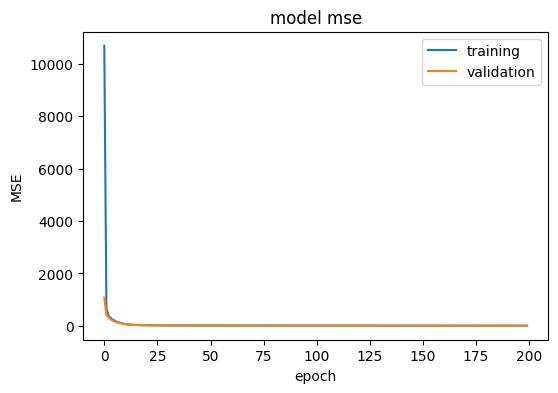

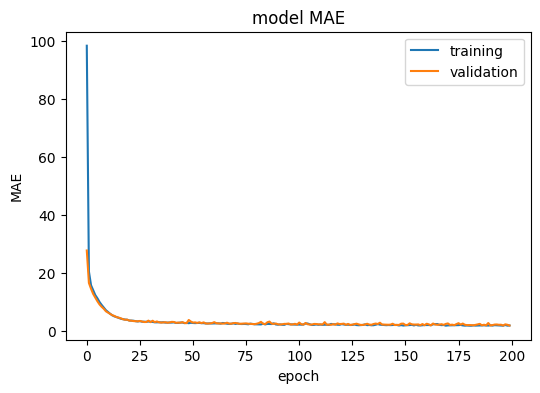

15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step

coefficient of determination: 0.860


In [ ]:
# plotting
plt.figure(figsize=(6,4))
plt.plot(history.history['loss'], label='training')
plt.plot(history.history['val_loss'], label='validation')
plt.title('model mse')
plt.xlabel('epoch')
plt.ylabel('MSE')
plt.legend()
plt.show()

plt.figure(figsize=(6,4))
plt.plot(history.history['mae'], label='training')
plt.plot(history.history['val_mae'], label='validation')
plt.title('model MAE')
plt.xlabel('epoch')
plt.ylabel('MAE')
plt.legend()
plt.show()

# calculate coefficient of determination
y_pred = model.predict(x_test)
r2 = r2_score(y_test, y_pred)
print(f"\ncoefficient of determination: {r2:.3f}")